# Dopamine profile

Fitting DA stimulation profile from Lihiri and Bevan 2020, figure 1D. Here we test first with a double exponential, then we do a second fit with two double exponentials.

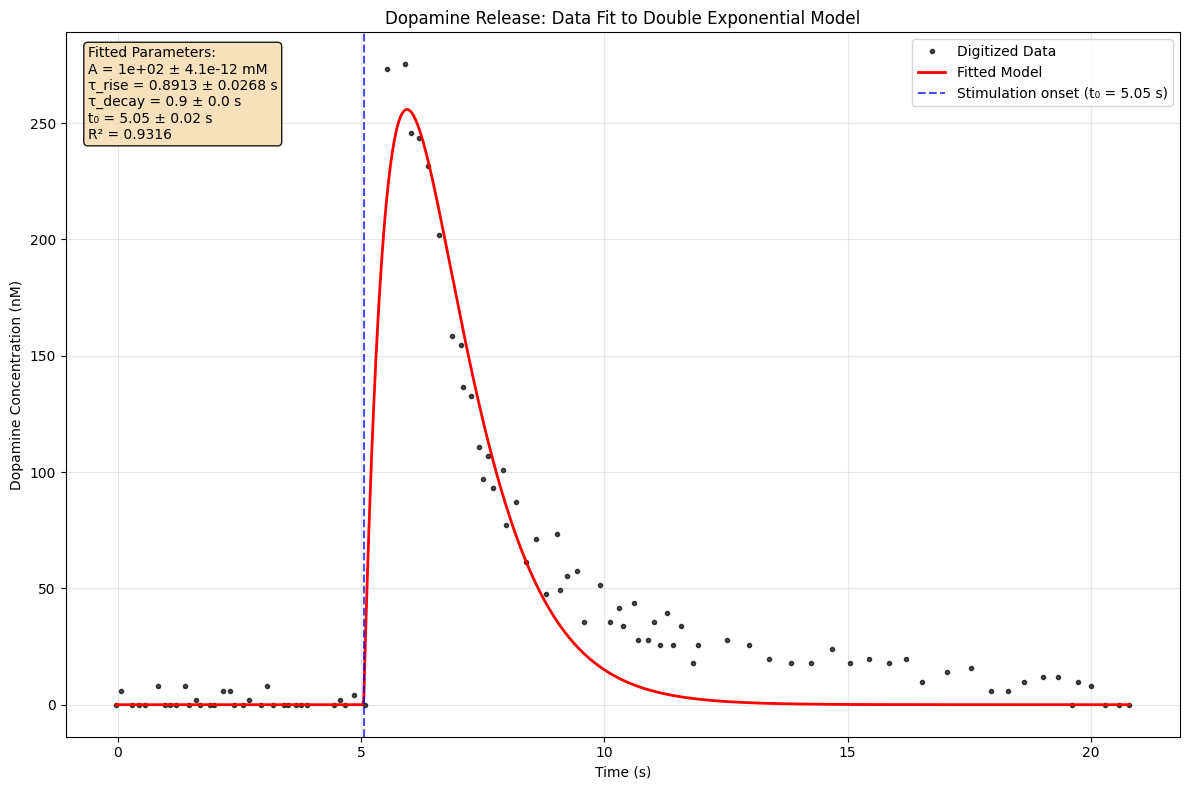

In [1]:
%run get_da_decay_4Hz

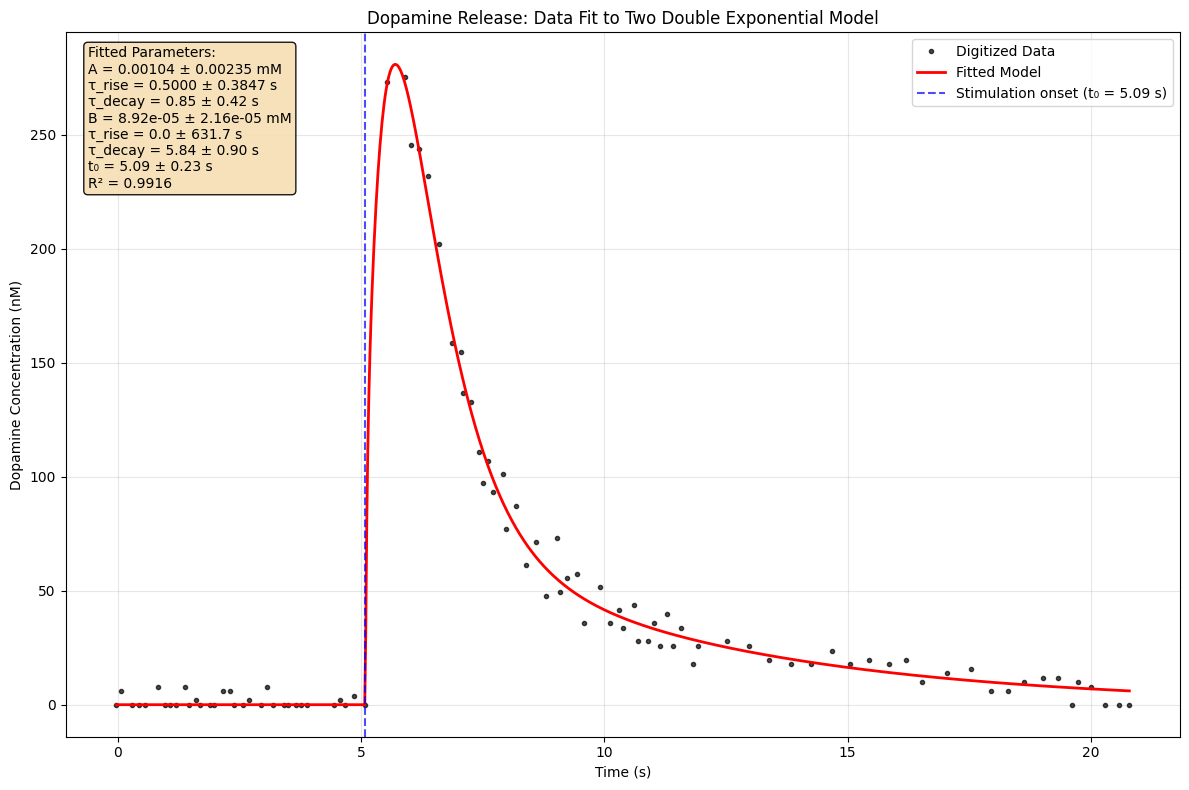

<Figure size 640x480 with 0 Axes>

In [2]:
%run get_da_decay2_4Hz

# Plotting the DA curve


In [3]:
df = pd.read_csv("LahiriBevan-Fig1D-4Hz.csv")
df.columns = df.columns.str.strip()
t_data = df["t"].values
C_data = df["C"].values
C_data = np.maximum(0, C_data)  # Can't have negative concentrations

In [4]:
A = 0.00104  # SI unit is mM
tauA_rise = 0.50
tauA_decay = 0.85
B = 8.92e-5
tauB_rise = 1e-4
tauB_decay = 5.84
t0 = 5.09

t_plot = np.linspace(min(t_data), max(t_data), 1000)
c_plot = dopamine_release2(t_plot, A, tauA_rise, tauA_decay, B, tauB_rise, tauB_decay, t0)

/home/hjorth/HBP/_Snudda-neuromodulation-article/virtual_experiments/LahiriBevan2020-fig1D/da_release2.py:19: RuntimeWarning: overflow encountered in exp
  + B * (np.exp(-(t-t0)/tau_decay2) - np.exp(-(t-t0)/tau_rise2))


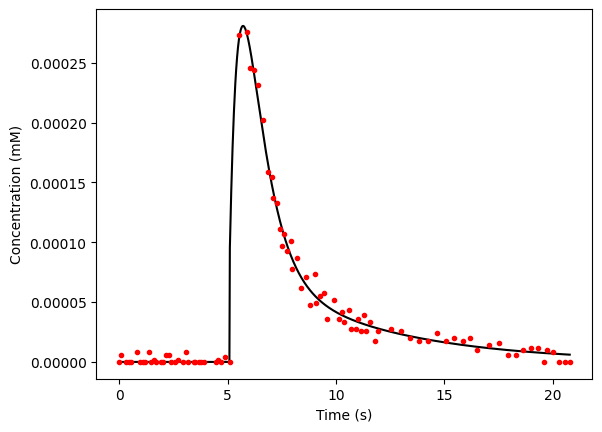

In [6]:
plt.figure()
plt.plot(t_plot, c_plot, 'k-')
plt.plot(t_data, C_data, 'r.')
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.show()

# Generating DA data for simulation

We are also moving the start to 3s to make the simulation run a little faster

In [7]:
t_start = 2
t_sim = np.union1d(np.linspace(0, 20, 21), np.linspace(t_start, t_start+1, 11))

In [8]:
c_sim = dopamine_release2(t_sim, A, tauA_rise, tauA_decay, B, tauB_rise, tauB_decay, t_start)

In [9]:
c_sim_round = np.array([float(f"{x:.2g}") for x in c_sim])

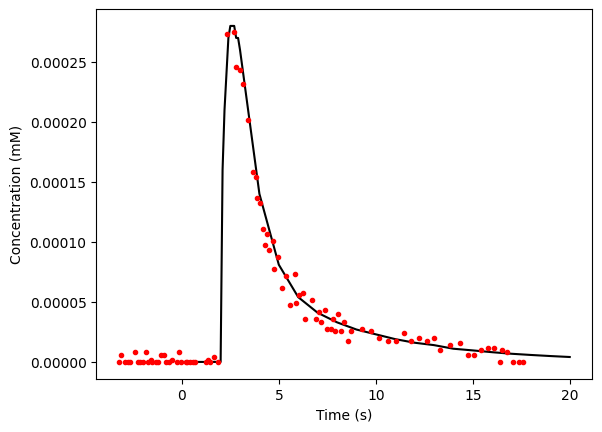

In [10]:
plt.figure()
plt.plot(t_sim, c_sim_round, 'k-')
plt.plot(t_data-5.22+t_start, C_data, 'r.')
plt.xlabel("Time (s)")
plt.ylabel("Concentration (mM)")
plt.show()

In [11]:
t_sim

array([ 0. ,  1. ,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,
        2.9,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. ])

In [12]:
c_sim_round

array([0.0e+00, 0.0e+00, 0.0e+00, 1.6e-04, 2.1e-04, 2.4e-04, 2.7e-04,
       2.8e-04, 2.8e-04, 2.8e-04, 2.7e-04, 2.7e-04, 2.6e-04, 1.4e-04,
       8.1e-05, 5.4e-05, 4.1e-05, 3.3e-05, 2.7e-05, 2.3e-05, 1.9e-05,
       1.6e-05, 1.4e-05, 1.1e-05, 9.6e-06, 8.1e-06, 6.8e-06, 5.8e-06,
       4.9e-06, 4.1e-06])